<a href="https://colab.research.google.com/github/Cill19/Malaria-Detection-Using-Symptoms/blob/main/Salinan_dari_Malaria_Detection_using_Symtoms_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MALARIA DETECTION USING SYMPTOMS

## Pendahuluan
* Proyek ini bertujuan untuk membangun sistem klasifikasi penyakit berbasis gejala menggunakan teknik machine learning. Sistem ini menerima deskripsi gejala dari pengguna dan memprediksi kemungkinan penyakit yang diderita khususnya malaria.


Data yang digunakan pada proyek ini diperoleh dari [kaggle](https://www.kaggle.com/datasets/niyarrbarman/symptom2disease/data).

Dataset terdiri dari 24 penyakit yang berbeda, dan setiap penyakit memiliki 50 deskripsi gejala, sehingga menghasilkan total 1.200 point data.

# Importing Libraries

Pada bagian ini, library yang diperlukan diimpor untuk melakukan berbagai tugas seperti manipulasi data, praproses teks, pembelajaran mesin, dan visualisasi.

In [ ]:
# Importing libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Download nltk resources

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# load dataset

Unduh file dataset kaggle di sini [kaggle](https://www.kaggle.com/datasets/niyarrbarman/symptom2disease/data)

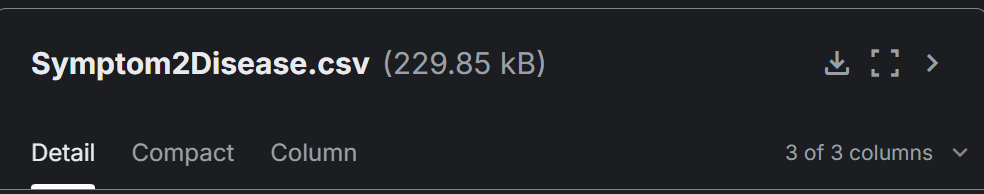

tekan ikon download

Kemudian impor ke dalam file colab di menu kiri "Upload ke Penyimpanan Sesi" hingga file csv terlihat di bawah folder sample_data


In [ ]:
# Load the dataset

data = pd.read_csv('/content/Symptom2Disease.csv')

##### Deskripsi Dataset

Kumpulan data terdiri dari 1200 titik data dan memiliki dua kolom: "label" dan "teks".

label: berisi label penyakit
teks: berisi deskripsi gejala dalam bahasa alami.

Kumpulan data terdiri dari 24 penyakit yang berbeda, dan setiap penyakit memiliki 50 deskripsi gejala, sehingga totalnya menjadi 1200 titik data.

24 penyakit berikut telah tercakup dalam kumpulan data:

Psoriasis, Varicose Veins, Typhoid, Chicken pox, Impetigo, Dengue, Fungal infection, Common Cold, Pneumonia, Dimorphic Hemorrhoids, Arthritis, Acne, Bronchial Asthma, Hypertension, Migraine, Cervical spondylosis, Jaundice, Malaria, Urinary tract infection, Allergy, Gastroesophageal reflux disease, Drug reaction, Peptic ulcer disease, Diabetes

# EDA
**Exploratory Data Analysis**

In [ ]:
# Displaying the dataset

data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


menghapus kolom bernama "Unnamed: 0" dari DataFrame

In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
data

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
# Ringkasan singkat DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [ ]:
# Memeriksa Nilai 0 dari dataset

data.isnull().sum()

,0
label,0
text,0


In [ ]:
# Display Kolom

data.columns

Index(['label', 'text'], dtype='object')

In [ ]:
data.value_counts()

label                    text                                                                                                                                                                                                                                                
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.                                   4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.                                      3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without feeling stiff. Walking has been really painful too.                                          3
Dimorphic Hemorrhoids    I'm having a lot of trouble with my bowel movements lately. It's hard to go and it hurts when I do. My anus is really sore and it's been bleeding when I go. It's really painful and I'm really uncomfortable.                                          2
Jaundice                 I've been feeling scratchy, sick, and worn out. I also had a high fever and lost weight. Both my skin and my urine have become yellow. Additional stomach pain that I've been having                                                                    2
                                                                                                                                                                                                                                                                                ..
Fungal infection         I've been having this constant itch and there are these red and bumpy spots on my skin. There are also some patches that are a different color than the rest of my skin, and I've had some bumps that are kind of like little lumps.                    1
                         I've been having this really annoying itch all over my body, and I have red and bumpy spots on my skin too. There are also some areas that are a different color than the rest of my skin, and I've had some bumps that look like little balls.         1
                         I've been itching a lot, and it's been accompanied with a rash that looks to be getting worse over time. There are also some patches of skin that are different colours from the rest of the skin, as well as some lumps that resemble little nodes.    1
                         I've been itching and have rashy patches all over my skin recently. There are also some regions that don't appear to be the regular tone of my skin, and I've experienced some painful bumps.                                                           1
urinary tract infection  There is blood in my urine and I have a low fever. My head hurts almost all the time and I get very strong uncontrollable urges to pee. I have been having pain in lower back also                                                                      1
Name: count, Length: 1153, dtype: int64

In [ ]:
# Extracting 'label' and 'text' columns from the 'data' DataFrame

labels = data['label']  # Kategori Penyakit
symptoms = data['text']  # Gejala

# Text Preprocessing

Preprocessing including tokenization, converting text to lowercase, and removing stopwords and non-alphabetic characters.

In [ ]:
# Text Preprocessing

stop_words = set(stopwords.words('english'))

In [ ]:
import nltk
nltk.download('punkt_tab')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def preprocess_text(text):
    """
    Preprocesses the input text by tokenizing, converting to lowercase,
    and removing stopwords and non-alphabetic characters.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text as a single string.
    """

    # Download the 'punkt_tab' resource if not already downloaded
    nltk.download('punkt_tab', quiet=True)  # quiet=True suppresses download messages

    # Tokenization
    words = word_tokenize(text.lower())

    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return ' '.join(words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Some Visualizations about the Data

In [ ]:
preprocessed_symptoms = symptoms.apply(preprocess_text)

## Word Cloud for symptoms:

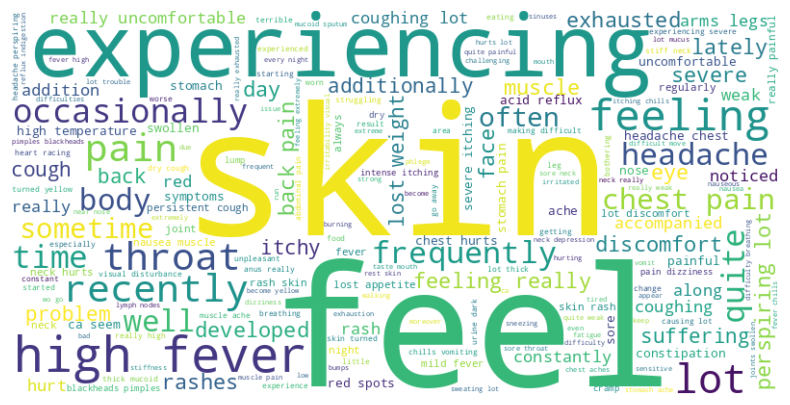

In [ ]:

# Generate Word Cloud for symptoms
all_text = ' '.join(preprocessed_symptoms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud diatas adalah sekumpulan teks yang sering muncul dari gejala di dataset

 ## Bar Chart for Disease Distribution:

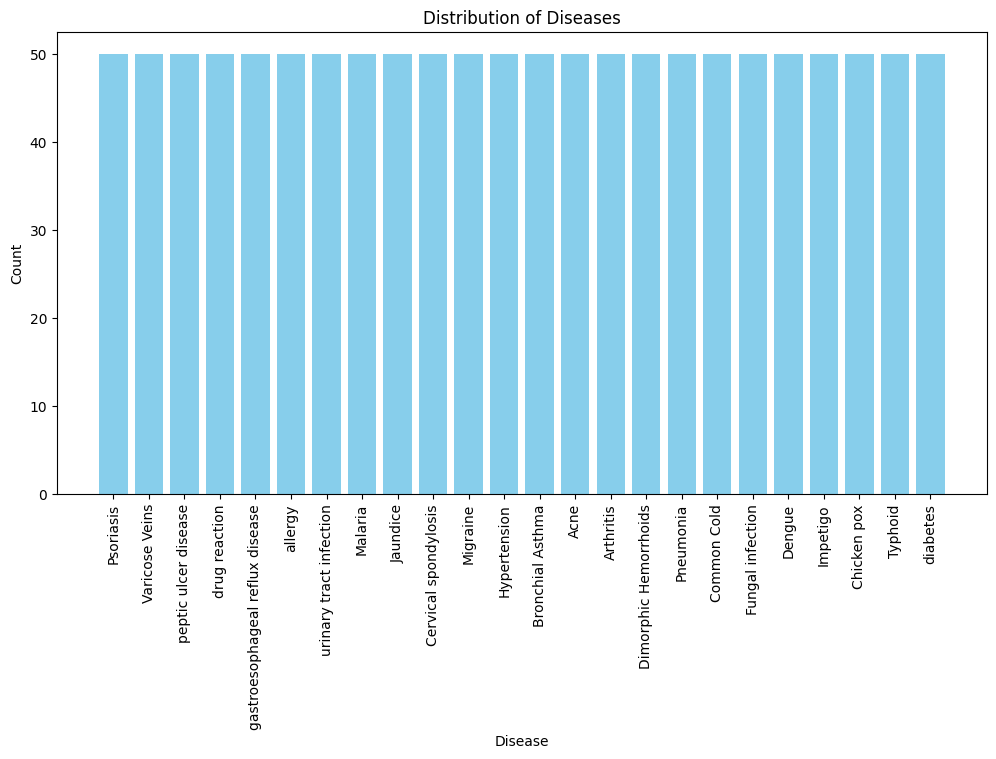

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

penyebaran dari jumlah penyakit di dataset seimbang

## Word Cloud for Common Symptoms:

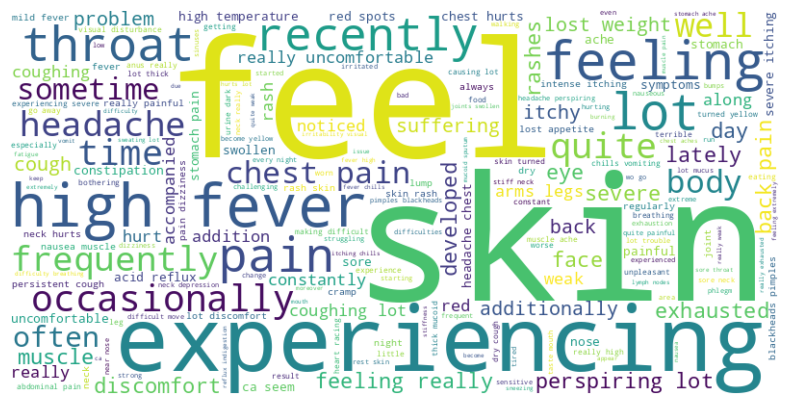

In [ ]:
from wordcloud import WordCloud

# Combine all symptoms into a single string
all_text = ' '.join(preprocessed_symptoms)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud diatas adalah sekumpulan teks yang sering muncul dari gejala umum yang timbul

# Feature Extraction using TF-IDF

Vektor TF-IDF (Term Frequency-Inverse Document Frequency) dihasilkan dari gejala yang telah diproses sebelumnya. Langkah ini mengubah data teks menjadi fitur numerik yang sesuai untuk model pembelajaran mesin.

In [ ]:
# Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # adjust max features tergantung dari dataset
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

# Splitting Data

Kumpulan data dibagi menjadi set pelatihan dan pengujian, dengan 80% data digunakan untuk melatih model dan 20% untuk menguji kinerjanya.

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

# Naive Bayes Model Training

Naive Bayes (NB) dilatih menggunakan fitur TF-IDF dan label penyakit yang sesuai dari set pelatihan.

Setting parameter yang digunakan adalah 2 dengan set alpha (parameter smoothing untuk Menghindari probabilitas nol) dan fit priority (Kelas dengan lebih banyak data akan memiliki probabilitas awal yang lebih tinggi.)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# MODEL NAIVE BAYES DENGAN 2 PARAMETERS
nb_classifier = MultinomialNB(alpha=1.0, fit_prior=True) # 2 parameters

# Train the model
nb_classifier.fit(X_train, y_train)

MultinomialNB()

# Making Predictions

hasil trained NB classifier digunakan untuk memprediksi label penyakit untuk gejala set pengujian.

In [ ]:
# Predictions

predictions = nb_classifier.predict(X_test)

# Model Evaluation

Keakuratan model dihitung menggunakan label yang diprediksi dan dibandingkan dengan label yang sebenarnya. Selain itu, laporan klasifikasi dibuat untuk memberikan metrik evaluasi terperinci.

In [ ]:
# Model Evaluation

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       1.00      0.92      0.96        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       0.85      0.92      0.88        12
          Dimorphic Hemorrhoids       0.78      1.00      0.88         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

# Confusion Matrix for Model Evaluation

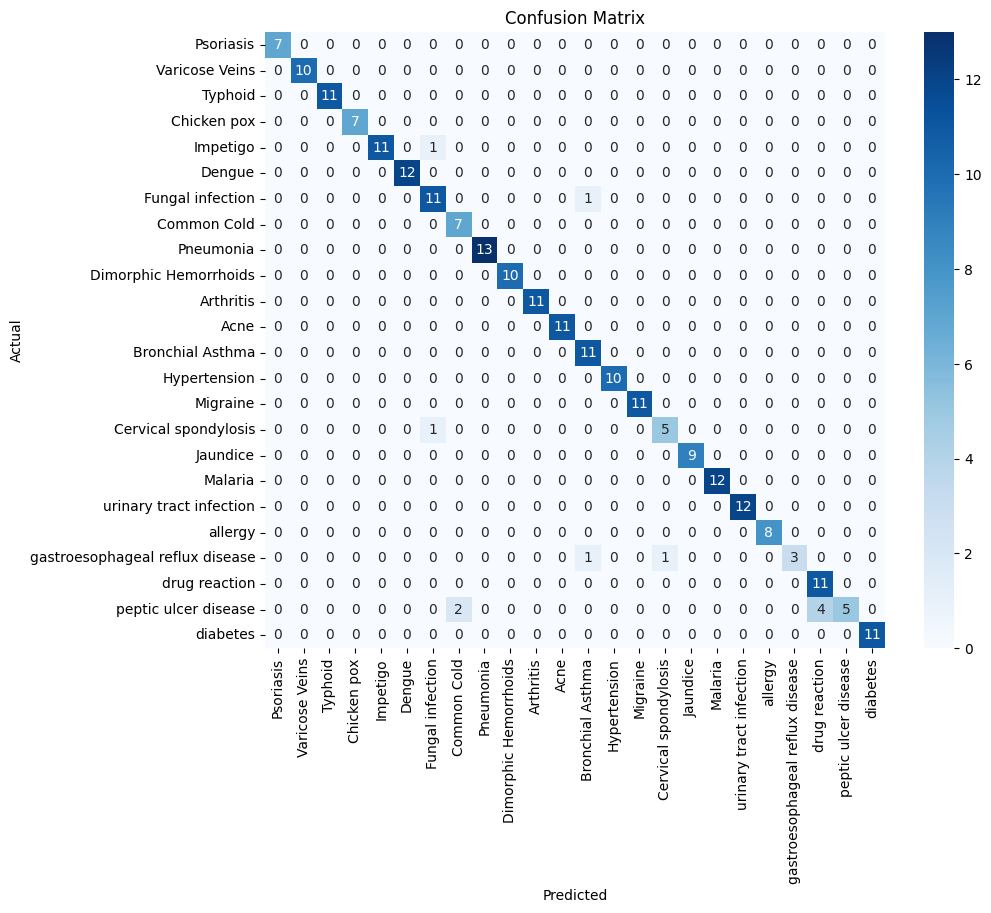

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion matrix yang ditampilkan menunjukkan kinerja model klasifikasi penyakit berbasis gejala, dengan diagonal utama merepresentasikan jumlah prediksi benar untuk setiap penyakit dari 24 penyakit yang diuji. Sel-sel di luar diagonal utama menunjukkan kesalahan klasifikasi, di mana model memprediksi penyakit yang salah. Secara umum, model menunjukkan performa yang baik dengan banyak prediksi benar di diagonal utama

# Contoh Prediksi

In [ ]:
# Example Usage
symptom = "Yesterday ive been experiencing itching, chills, vomiting, and a high fever"

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Predict the disease
predicted_disease = nb_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')


Predicted Disease: Malaria


In [ ]:
import joblib

# Save the trained NB model
joblib.dump(nb_classifier, 'nb_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
import joblib

# Load the trained NB model and TF-IDF vectorizer
nb_classifier = joblib.load('nb_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_disease(symptoms):
    # Preprocess the input symptoms
    preprocessed_symptoms = preprocess_text(symptoms)

    # Transform the preprocessed symptoms using the loaded vectorizer
    symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptoms])

    # Predict the probabilities of each disease
    predicted_probabilities = nb_classifier.predict_proba(symptom_tfidf)[0]

    # Get the index of the "Malaria" class
    malaria_index = nb_classifier.classes_.tolist().index('Malaria')

    # Get the probability of Malaria
    malaria_probability = predicted_probabilities[malaria_index]



In [ ]:
def predict_malaria_probability(symptoms):
    # Load the trained NB model and TF-IDF vectorizer
    nb_classifier = joblib.load('nb_model.pkl')
    tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

    # Preprocess the input symptoms
    preprocessed_symptoms = preprocess_text(symptoms)

    # Transform the preprocessed symptoms using the loaded vectorizer
    symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptoms])

    # Predict the probabilities of each disease
    predicted_probabilities = nb_classifier.predict_proba(symptom_tfidf)[0]

    # Get the index of the "Malaria" class
    malaria_index = nb_classifier.classes_.tolist().index('Malaria')

    # Get the probability of Malaria
    malaria_probability = predicted_probabilities[malaria_index]

    return malaria_probability

# Get symptoms from the user
user_symptoms = input("Enter your symptoms: ")

# Predict the probability of malaria
malaria_probability = predict_malaria_probability(user_symptoms)

# Print the result
print(f"The probability of having malaria based on your symptoms is: {malaria_probability:.2f}")

Enter your symptoms: Yesterday ive been experiencing itching, chills, vomiting, and a high fever
The probability of having malaria based on your symptoms is: 0.36


masukkan kata gejala yang akan model prediksi contoh : Yesterday ive been experiencing itching, chills, vomiting, and a high fever

# Kesimpulan :
# Proyek ini berhasil membangun model klasifikasi penyakit berbasis gejala menggunakan algoritma Naive Bayes dengan akurasi mencapai 95% dan menggunakan teknik TF-IDF untuk ekstraksi fitur. Model ini mampu memprediksi kemungkinan penyakit berdasarkan gejala yang dimasukkan oleh pengguna. Prediksi berupa probabilitas penyakit Malaria dari gejala yang diinput user

**Note : Prediksi tidak 100% benar karena mengacu dari pelatihan dataset yang diberikan**